In [ ]:
import pandas as pd

In [ ]:
#reading in the data set
game_data = pd.read_excel('/content/Video_Games.xlsx')
df = game_data.copy()

In [ ]:
#preprocessing
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
#importing to excel to analyze in tableau
df.to_excel("clean_video_game_data.xlsx")

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
#creates a column that puts user_score on a scale of 100 instead of 10
df['user_score_100'] = df['User_Score'] * 10

# Decision Trees - Can we predict whether users and critics rate a game high or low?




In [ ]:
#creating a new dataset just for the decision trees
tree_df = df.copy()

#function analyzes critic and user score to say whether each game had high scores for both critics and users, low scores for both critics and users, or contradicting scores in each category.
def create_score_category_column(tree_df, critic_threshold, user_threshold):

    score_categories_agree = []
    score_categories_disagree = []

    for index, row in tree_df.iterrows():
        if row['Critic_Score'] >= critic_threshold and row['User_Score'] >= user_threshold:
            score_categories_agree.append('high_high')
            score_categories_disagree.append(None)
        elif row['Critic_Score'] >= critic_threshold and row['User_Score'] < user_threshold:
            score_categories_disagree.append('high_low')
            score_categories_agree.append(None)
        elif row['Critic_Score'] < critic_threshold and row['User_Score'] >= user_threshold:
            score_categories_disagree.append('low_high')
            score_categories_agree.append(None)
        else:
            score_categories_agree.append('low_low')
            score_categories_disagree.append(None)

    tree_df['score_category_agree'] = score_categories_agree
    tree_df['score_category_disagree'] = score_categories_disagree

    return tree_df

tree_df = create_score_category_column(tree_df, critic_threshold=75, user_threshold=7.5)


In [ ]:
#new dataframe only needs certain columns
columns_to_drop = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'user_score_100', 'Developer', 'NA_Sales']
tree_df = tree_df.drop(columns=columns_to_drop)

In [ ]:
tree_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,score_category_agree,score_category_disagree
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8,322.0,E,high_high,None
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E,high_high,None
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8,192.0,E,high_high,None
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,E,high_high,None
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E,low_low,None


In [ ]:
tree_df_agree = tree_df.dropna(subset=['score_category_agree'])

In [ ]:
enc_tree_agree = pd.get_dummies(tree_df_agree, columns = ['Platform', 'Genre', 'Rating'])

In [ ]:
column_names = enc_tree_agree.columns.tolist()
print(column_names)

['Name', 'Year_of_Release', 'Publisher', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'score_category_agree', 'score_category_disagree', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T']


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#creating train and test sets for the decision trees
X = enc_tree_agree[['Year_of_Release', 'Global_Sales', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T']]
y = enc_tree_agree['score_category_agree']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import tree

features = X_train
#x train
labels = y_train
#y

clf = tree.DecisionTreeClassifier()

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf = 10)

clf = clf.fit(features, labels)

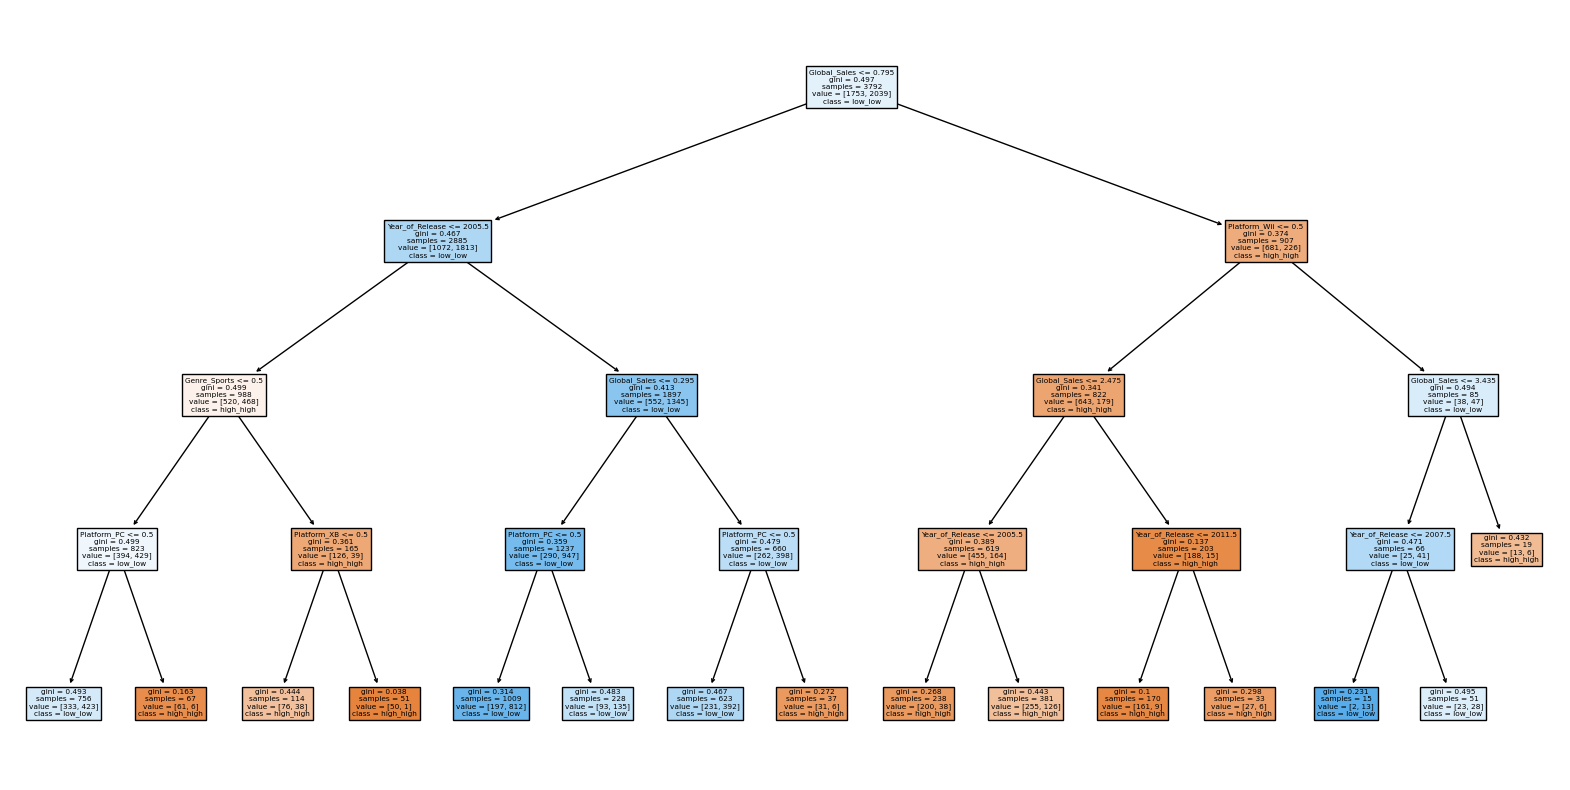

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=features.columns, class_names=clf.classes_)
plt.show()

# -First High/Low is Critic Score; Second High/Low is User Score

In [ ]:
tree_df_dis = tree_df.dropna(subset=['score_category_disagree'])

In [ ]:
enc_tree_dis = pd.get_dummies(tree_df_dis, columns = ['Platform', 'Genre', 'Rating'])

In [ ]:
column_names = enc_tree_dis.columns.tolist()
print(column_names)

['Name', 'Year_of_Release', 'Publisher', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'score_category_agree', 'score_category_disagree', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_T']


In [ ]:
#creating train and test sets for the second decision tree
X = enc_tree_dis[['Year_of_Release', 'Global_Sales', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_T']]
y = enc_tree_dis['score_category_disagree']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
features = X_test
labels = y_test

clf = tree.DecisionTreeClassifier()

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

clf = clf.fit(features, labels)

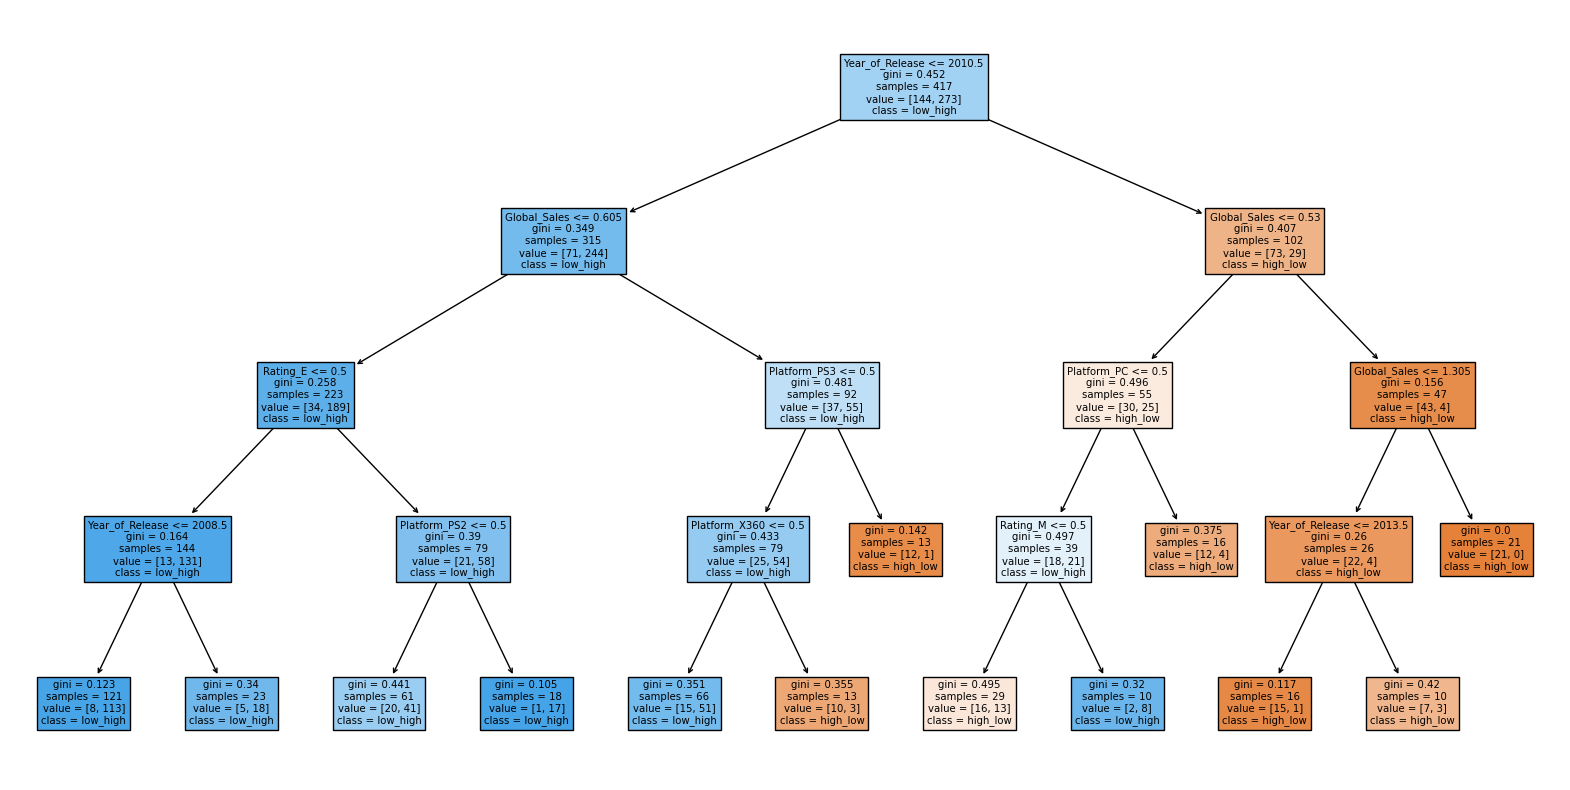

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=features.columns, class_names=clf.classes_)
plt.show()

# Linear Regression Model

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,user_score_100
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,80
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,83.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,80
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,85.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,66.0


In [ ]:
df_linreg = pd.get_dummies(df, columns = ['Platform', 'Genre', 'Rating'])

column_names = df_linreg.columns.tolist()
print(column_names)

['Name', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'user_score_100', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP', 'Rating_T']


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_linreg[['Year_of_Release', 'Critic_Score', 'User_Score', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP', 'Rating_T']]
y = df_linreg['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(comparison_df)

Mean Squared Error: 2.2574794256845867
R-squared: 0.16933026734436207
       Actual Sales  Predicted Sales
146            6.03         2.271053
4427           0.44         0.554762
6970           0.23         0.855748
3885           0.51         0.649777
11023          0.09         0.102727
...             ...              ...
2447           0.85         1.454170
14897          0.03         0.140167
7156           0.22         0.147482
13120          0.05        -0.199135
2138           0.96         1.410612

[1365 rows x 2 columns]


<ipython-input-53-3e4793d51dbc>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


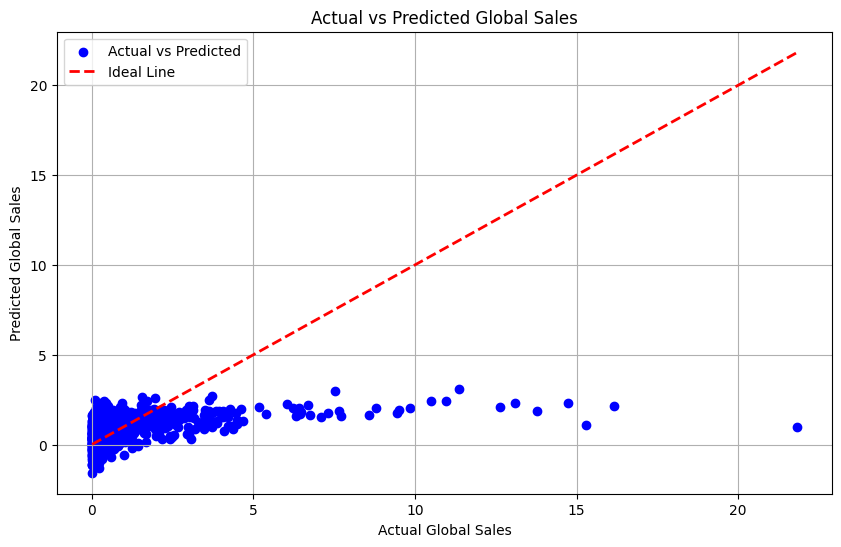

In [ ]:
import matplotlib.pyplot as plt


# Scatter plot of actual vs predicted sales with noise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_linreg.to_excel("linear_reg_data.xlsx")